In [57]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [221]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Total Sales Info

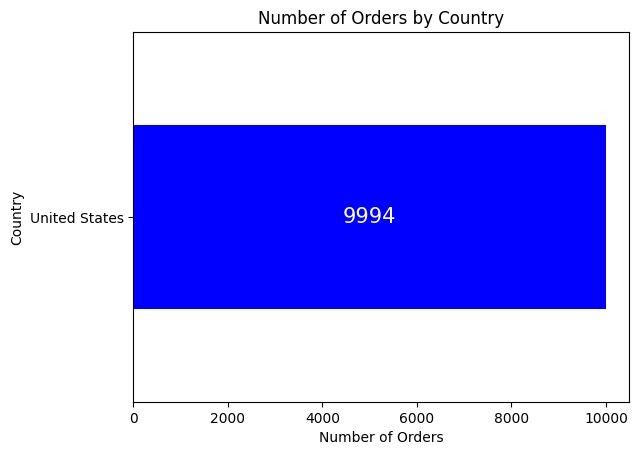

In [172]:
country = df['Country'].groupby(df['Country']).count()
ax = country.plot(kind='barh', title='Number of Orders by Country', color='blue')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Country')

for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', fontsize=15)
plt.show()

### All sales are made in the United States.

In [173]:
from IPython.display import Markdown
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
gross_margin = total_profit / total_sales * 100
Markdown(f"""
**Total Sales and Profit**

- 🛒 Total Sales: **${total_sales:,.2f}**  
- 💰 Total Profit: **${total_profit:,.2f}**  
- 📊 Gross Margin: **{gross_margin:.2f}%**
""")



**Total Sales and Profit**

- 🛒 Total Sales: **$2,297,200.86**  
- 💰 Total Profit: **$286,397.02**  
- 📊 Gross Margin: **12.47%**


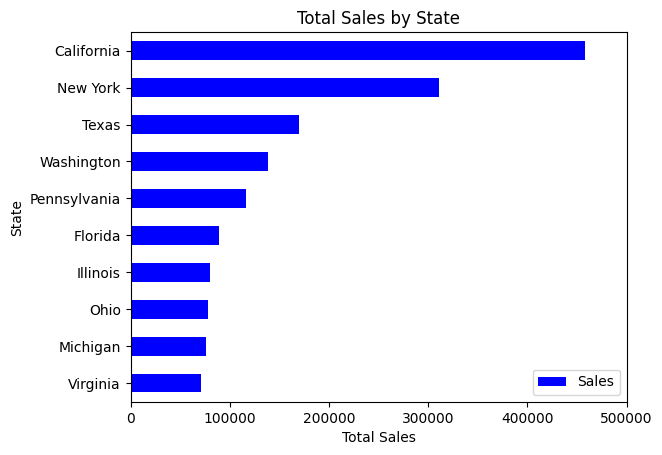

In [174]:
by_state = df[['State', 'Sales']].groupby('State').sum().sort_values(by='Sales', ascending=True)
top_ten = by_state.tail(10)
ax = top_ten.plot(kind='barh', title='Total Sales by State', color='blue')
ax.set_xticks([0, 100000, 200000, 300000, 400000, 500000])
ax.set_xlabel('Total Sales')
ax.set_ylabel('State')
plt.show()
top_ten = by_state.tail(10).sort_values(by='Sales', ascending=False).style.format('${:,.2f}')

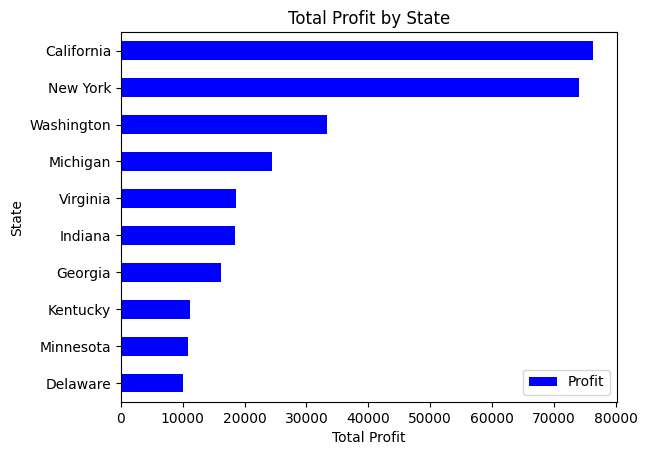

In [175]:
by_state = df[['State', 'Profit']].groupby('State').sum().sort_values(by='Profit', ascending=True)
top_ten = by_state.tail(10)
ax = top_ten.plot(kind='barh', title='Total Profit by State', color='blue')
ax.set_xticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000])
ax.set_xlabel('Total Profit')
ax.set_ylabel('State')
plt.show()
top_ten = by_state.tail(10).sort_values(by='Profit', ascending=False).style.format('${:,.2f}')

### New York is the most profitable state.

# Which Department is the most profitable?

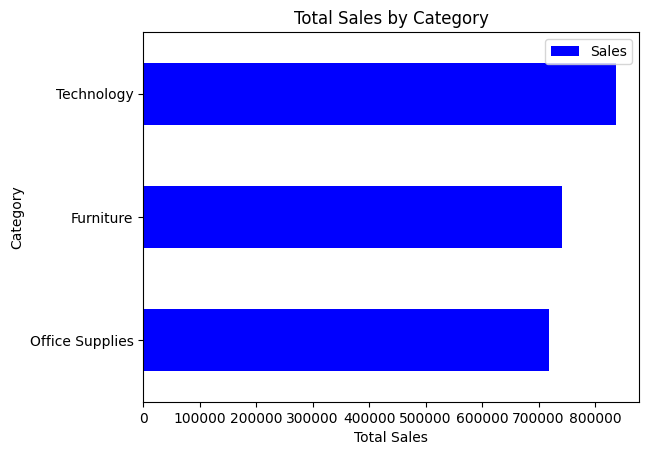

In [208]:
sales_by_category = df[['Category', 'Sales']].groupby('Category').sum().sort_values(by='Sales', ascending=True)
ax = sales_by_category.plot(kind='barh', title='Total Sales by Category', color='blue')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Category')
plt.show()

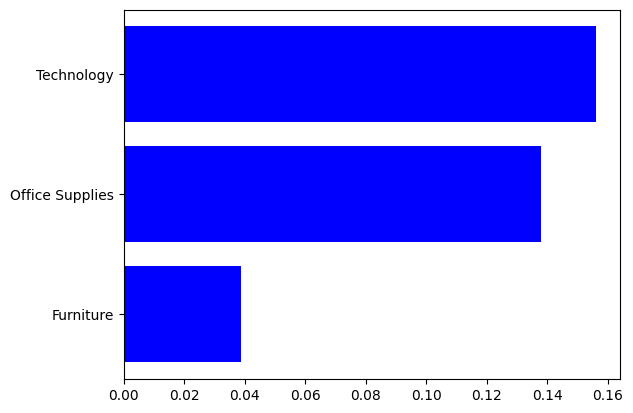

In [232]:
df['Profitability'] = df['Profit'] / df['Sales']
x = df['Profitability'].groupby(df['Category']).mean()
y = df['Category'].unique()
plt.barh(y, x, color='blue')
plt.show()

### Technology is the most profitable category.


# Looking Further Into California and New York Profitability


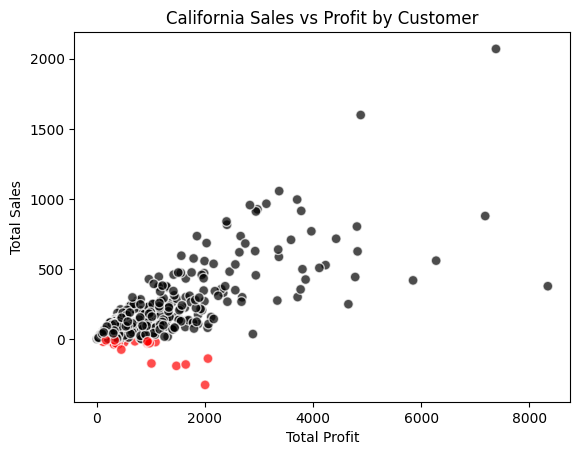

In [ ]:
cal = df[df['State'] == 'California']
cal_profit = cal['Profit'].groupby(cal['Customer Name']).sum()
cal_sales = cal['Sales'].groupby(cal['Customer Name']).sum()
colors =['black' if profit >=0 else 'red' for profit in cal_profit]
plt.scatter(cal_sales, cal_profit,color=colors, alpha=0.7,edgecolor='w', s=50)
plt.title('California Sales vs Profit by Customer')
plt.xlabel('Total Profit')
plt.ylabel('Total Sales')
plt.show()

## Most high spending customers are profitable.